The objective of this notebook is to visualize in 2D the available data (Data_v7.csv, Data_v9.csv and Data_v10.csv) and to highlight all entries corresponding to one participant in Data_v9.csv and Data_v10.csv in order to check that if are grouped together in their 2D representation.

In [1]:
import pandas as pd
import numpy as np
#import random
from sklearn import preprocessing, decomposition
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt


In [2]:
table7 = pd.read_csv("Data_v7.csv", header=0, sep=",")
table9 = pd.read_csv("Data_v9.csv", header=0, sep=",")
table10 = pd.read_csv("Data_v10.csv", header=0, sep=",")
types = {"EPI":1,"EPG2019S":1,"CONTROLES":0,"AsG2019S-":0} 
users = table7["Patient"].to_list()

In [3]:
# Eliminate Age and Turning time
data = np.array(table7.iloc[:,3:-1])
labels = np.array(table7.iloc[:,-1])
labels = np.array([types[lab] for lab in labels])
# scaling data
scaler = preprocessing.StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

We start by applying PCA and TSNE dimensionality reduction to the original data

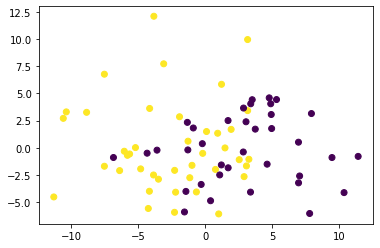

In [4]:
# Applying PCA dimentionality reduction
trans = decomposition.PCA(n_components=2)
components = trans.fit_transform(data)
plt.scatter(components[:, 0], components[:, 1], c=labels)
#plt.savefig("PCA.png")

In [5]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = trans.explained_variance_ratio_
print(" ".join(["%.2f"%elem for elem in exp_var_pca]))

0.19 0.11


Let us try a 3D representation

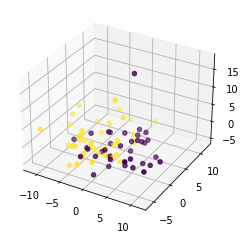

In [6]:
# Applying PCA dimentionality reduction
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
trans = decomposition.PCA(n_components=3)
components = trans.fit_transform(data)
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=labels)
#plt.savefig("PCA_3D.png")

In [7]:
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = trans.explained_variance_ratio_
print(" ".join(["%.2f"%elem for elem in exp_var_pca]))

0.19 0.11 0.09


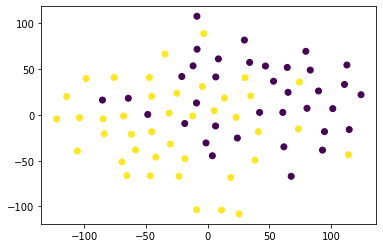

In [8]:
# Applying TSNE dimentionality reduction
trans = TSNE(n_components=2)
components = trans.fit_transform(data)
plt.scatter(components[:, 0], components[:, 1], c=labels)
#plt.savefig("TSNE.png")

We repeat the procedure for Data_v9.csv and Data_v10.csv with both PCA and TSNE

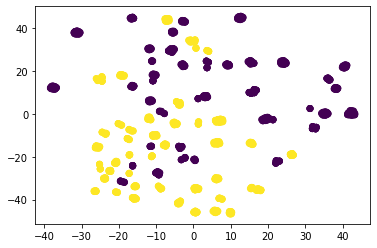

In [9]:
### The posibilities are: 9 and 10 for the dataset version
### and TSNE or PCA for the type of dimensionality reduction·
### changing the name accordingly
choose = ("9","TSNE")
if choose[0]=="9":
    table = table9
else:
    table = table10
if choose[1]=="PCA":
    trans = decomposition.PCA(n_components=2)
else:
    trans = TSNE(n_components=2)
    
# Eliminate Age and Turning time
data = np.array(table.iloc[:,3:-1])
labels = np.array(table.iloc[:,-1])
labels = np.array([types[lab] for lab in labels])
# scaling data
scaler = preprocessing.StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

components = trans.fit_transform(data)
plt.scatter(components[:, 0], components[:, 1], c=labels)
#plt.savefig("%s_data%.png"%(choose[1],choose[0]))

Now we do the same but we highlight all entries of a given user.

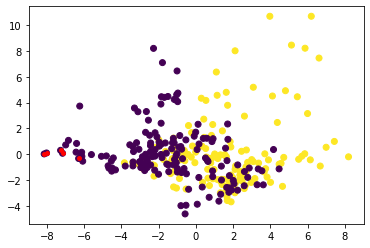

In [10]:
### The posibilities are: 9 and 10 for the dataset version
### and TSNE or PCA for the type of dimensionality reduction·
### changing the name accordingly
choose = ("10","PCA")
if choose[0]=="9":
    table = table9
else:
    table = table10
if choose[1]=="PCA":
    trans = decomposition.PCA(n_components=2)
else:
    trans = TSNE(n_components=2)
# Eliminate Age and Turning time
data = np.array(table.iloc[:,3:-1])
labels = np.array(table.iloc[:,-1])
labels = np.array([types[lab] for lab in labels])
# scaling data
scaler = preprocessing.StandardScaler()
scaler.fit(data)
data = scaler.transform(data)
for i in range(len(users)):
    user = users[i]
    user_index = table.index[table['Patient'] == user].tolist()
    components = trans.fit_transform(data)
    plt.clf()    
    plt.scatter(components[:, 0], components[:, 1], c=labels)
    plt.scatter(components[user_index, 0], components[user_index, 1], c="r",s=15)
    #plt.savefig("Highlighted/Data %s/%s_user_%s_%s.png"%(choose[0],choose[1],i,user))